In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly
import seaborn as sns

In [43]:
df = pd.read_csv('./tienda_ventas.csv')
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0
1,1,2013-01-01,1,BABY CARE,0.00000,0
2,2,2013-01-01,1,BEAUTY,0.00000,0
3,3,2013-01-01,1,BEVERAGES,0.00000,0
4,4,2013-01-01,1,BOOKS,0.00000,0
...,...,...,...,...,...,...
2161561,2161561,2016-04-30,9,POULTRY,826.35300,0
2161562,2161562,2016-04-30,9,PREPARED FOODS,165.65399,0
2161563,2161563,2016-04-30,9,PRODUCE,2012.72700,1
2161564,2161564,2016-04-30,9,SCHOOL AND OFFICE SUPPLIES,10.00000,0


In [44]:
df_filtrado = df[["date", "store_nbr", "sales"]]
df_filtrado

,date,store_nbr,sales
0,2013-01-01,1,0.00000
1,2013-01-01,1,0.00000
2,2013-01-01,1,0.00000
3,2013-01-01,1,0.00000
4,2013-01-01,1,0.00000
...,...,...,...
2161561,2016-04-30,9,826.35300
2161562,2016-04-30,9,165.65399
2161563,2016-04-30,9,2012.72700
2161564,2016-04-30,9,10.00000


In [45]:
df_filtrado['mes'] = df_filtrado['date'].apply(lambda x: x[:7])

df_agrupado = df_filtrado.groupby(['mes', 'store_nbr'])['sales'].sum().reset_index()
df_agrupado

C:\Users\patry\AppData\Local\Temp\ipykernel_30560\1916706938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['mes'] = df_filtrado['date'].apply(lambda x: x[:7])


,mes,store_nbr,sales
0,2013-01,1,156864.199004
1,2013-01,2,218534.833002
2,2013-01,3,496574.280985
3,2013-01,4,209295.859959
4,2013-01,5,206884.828039
...,...,...,...
2155,2016-04,50,602295.927970
2156,2016-04,51,741363.900048
2157,2016-04,52,0.000000
2158,2016-04,53,318880.329236


In [46]:
df_pivot = df_agrupado.pivot_table(index='mes', columns='store_nbr', values='sales', fill_value=0)
df_pivot

store_nbr,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
mes,,,,,,,,,,,,,,,,,,,,,
2013-01,156864.199004,218534.833002,4.965743e+05,209295.859959,206884.828039,277174.731967,241521.916105,315457.444984,275783.088972,115863.234032,...,5.394207e+05,4.851985e+05,5.328300e+05,393039.644168,2.918911e+05,341249.754079,356964.263039,0.0,0.000000,110124.798000
2013-02,129814.332014,195284.587042,4.296186e+05,183875.168026,189681.024011,241863.931978,219496.627989,274554.326952,270772.988953,111732.101048,...,5.034798e+05,4.469718e+05,4.779170e+05,369976.821263,2.583201e+05,323027.227966,318236.043100,0.0,0.000000,108542.824013
2013-03,151666.227994,229064.695967,5.316862e+05,222346.659981,211222.252991,296197.406976,265404.151072,330302.085987,335130.363029,131225.051964,...,6.015846e+05,5.316344e+05,5.788542e+05,447756.715286,3.250036e+05,374337.286047,356299.780015,0.0,0.000000,128412.559009
2013-04,155848.493959,225228.713980,5.120721e+05,208460.129010,198402.483941,282872.161010,263720.697014,320260.757001,331206.982972,138870.275027,...,5.572005e+05,4.865555e+05,5.248006e+05,413425.020003,3.128943e+05,348366.691837,359637.389082,0.0,0.000000,121185.336012
2013-05,154965.652004,228265.450078,5.181973e+05,214306.581983,215296.974989,290725.825965,274149.259992,329159.068040,327240.726897,140865.992056,...,5.764108e+05,5.023400e+05,5.376800e+05,421302.961073,3.285801e+05,361603.265001,408213.346160,0.0,0.000000,132233.628993
2013-06,154051.426999,239085.941026,5.443877e+05,219865.072982,209827.508081,299639.558982,275549.411989,331004.811024,338969.922998,146942.342977,...,5.914544e+05,5.101676e+05,5.493326e+05,436320.137003,3.290144e+05,356335.724030,403046.258963,0.0,0.000000,129772.967000
2013-07,156757.218014,229389.600022,5.173358e+05,211088.040113,213844.064034,281006.471990,261548.939017,319030.651047,322130.303958,135710.581993,...,5.542560e+05,4.807294e+05,4.937887e+05,401904.368981,3.095823e+05,355119.079156,400837.207014,0.0,0.000000,124726.445996
2013-08,149183.312957,234816.993993,5.325380e+05,205759.032001,223534.306011,278802.712975,253879.861984,320112.751975,339126.578900,144899.418010,...,5.657099e+05,5.007798e+05,5.074047e+05,417463.436092,3.247055e+05,354176.408970,420366.967011,0.0,0.000000,135996.011008
2013-09,152075.480020,250348.787999,5.530405e+05,216418.160946,203217.291010,301429.098930,277449.155067,331418.577005,353910.442004,142391.734043,...,5.858765e+05,5.159002e+05,5.717760e+05,445250.058918,3.588367e+05,360904.547880,393087.555011,0.0,0.000000,128751.982994


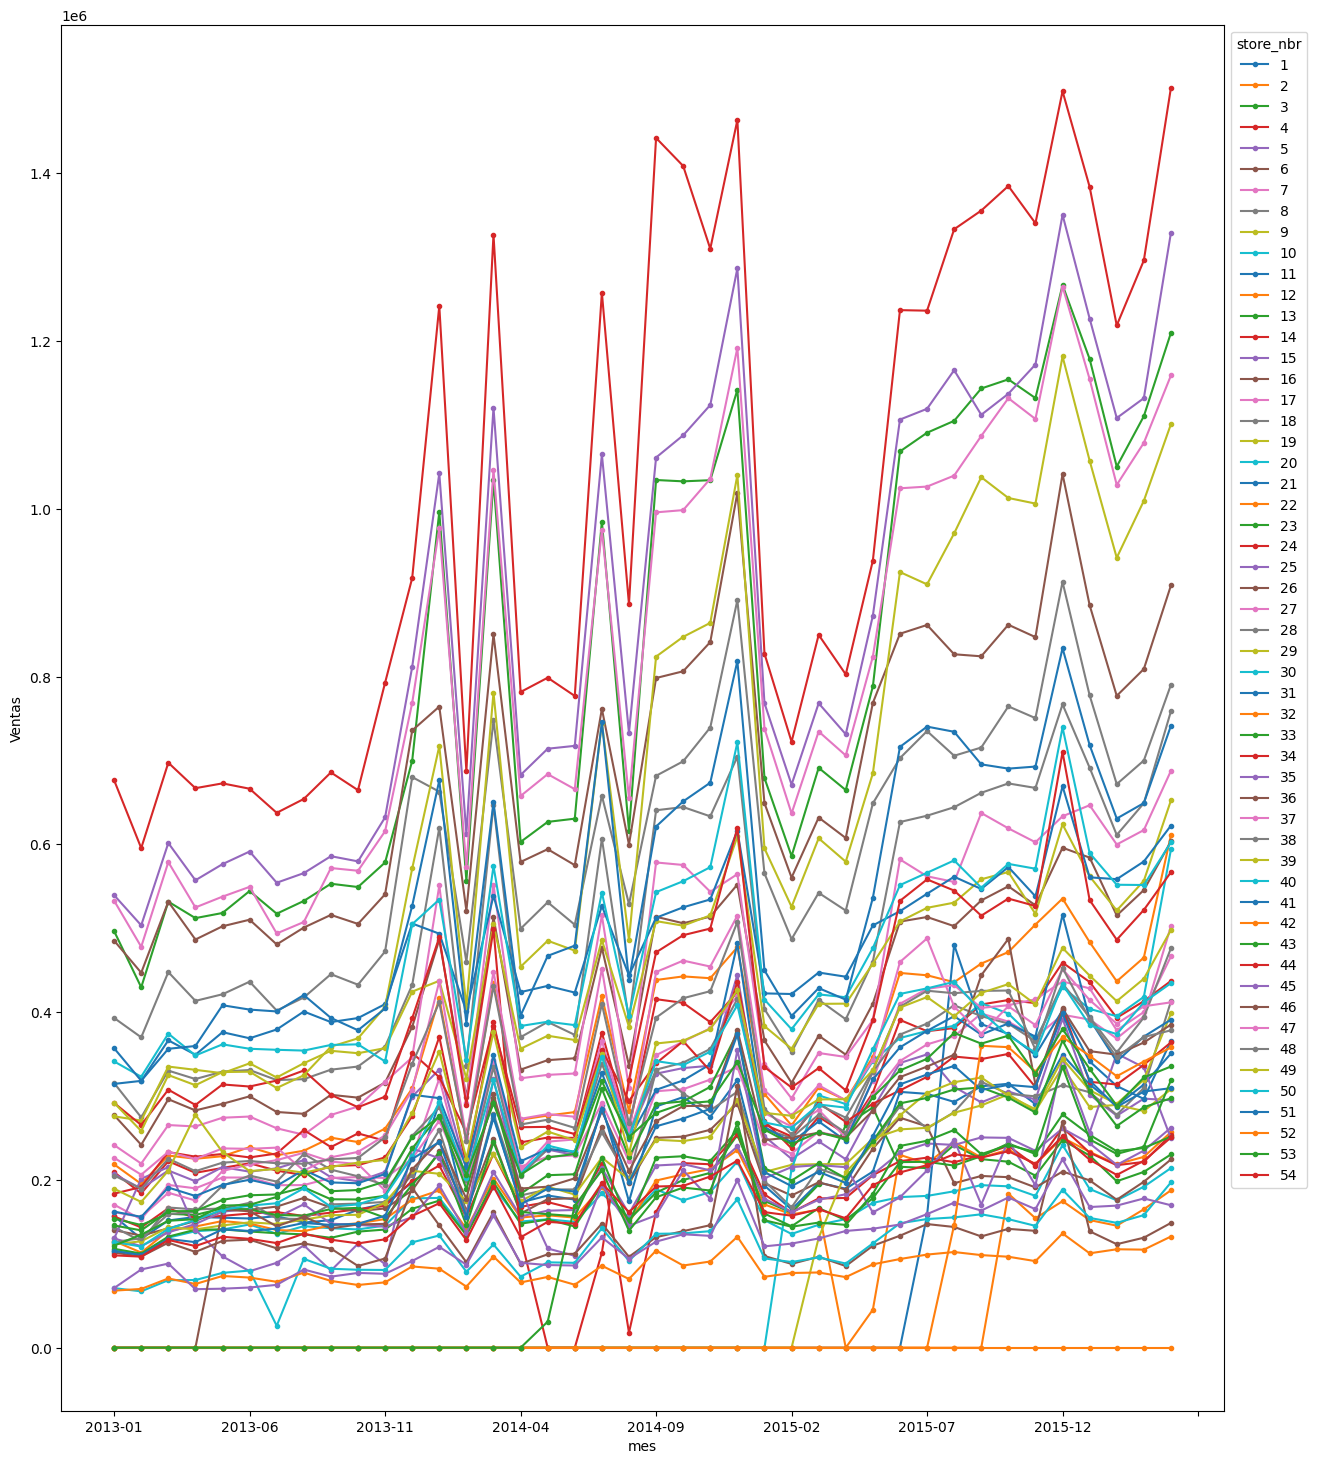

In [56]:
ax = df_pivot.plot.line(style='.-', figsize=(15, 18))

ax.legend(title='store_nbr',loc='upper left', bbox_to_anchor=(1, 1))

ax.set_ylabel('Ventas')

plt.show()